In [27]:
import bs4 as bs
import datetime
import requests
import yfinance as yf
import pandas as pd
from scripts import get_weekday

In [3]:
resp = requests.get('http://en.wikipedia.org/wiki/List_of_S%26P_500_companies')

In [4]:
soup = bs.BeautifulSoup(resp.text, 'lxml')
table = soup.find('table', {'class': 'wikitable sortable'})
tickers = []
for row in table.findAll('tr')[1:]:
    ticker = row.find('td').text.strip()
    tickers.append(ticker)

In [5]:
print(tickers)

['MMM', 'AOS', 'ABT', 'ABBV', 'ACN', 'ADBE', 'AMD', 'AES', 'AFL', 'A', 'APD', 'ABNB', 'AKAM', 'ALB', 'ARE', 'ALGN', 'ALLE', 'LNT', 'ALL', 'GOOGL', 'GOOG', 'MO', 'AMZN', 'AMCR', 'AEE', 'AAL', 'AEP', 'AXP', 'AIG', 'AMT', 'AWK', 'AMP', 'AME', 'AMGN', 'APH', 'ADI', 'ANSS', 'AON', 'APA', 'AAPL', 'AMAT', 'APTV', 'ACGL', 'ADM', 'ANET', 'AJG', 'AIZ', 'T', 'ATO', 'ADSK', 'ADP', 'AZO', 'AVB', 'AVY', 'AXON', 'BKR', 'BALL', 'BAC', 'BK', 'BBWI', 'BAX', 'BDX', 'BRK.B', 'BBY', 'BIO', 'TECH', 'BIIB', 'BLK', 'BX', 'BA', 'BKNG', 'BWA', 'BXP', 'BSX', 'BMY', 'AVGO', 'BR', 'BRO', 'BF.B', 'BLDR', 'BG', 'CDNS', 'CZR', 'CPT', 'CPB', 'COF', 'CAH', 'KMX', 'CCL', 'CARR', 'CTLT', 'CAT', 'CBOE', 'CBRE', 'CDW', 'CE', 'COR', 'CNC', 'CNP', 'CF', 'CHRW', 'CRL', 'SCHW', 'CHTR', 'CVX', 'CMG', 'CB', 'CHD', 'CI', 'CINF', 'CTAS', 'CSCO', 'C', 'CFG', 'CLX', 'CME', 'CMS', 'KO', 'CTSH', 'CL', 'CMCSA', 'CAG', 'COP', 'ED', 'STZ', 'CEG', 'COO', 'CPRT', 'GLW', 'CPAY', 'CTVA', 'CSGP', 'COST', 'CTRA', 'CRWD', 'CCI', 'CSX', 'CMI', '

In [8]:
start = datetime.datetime(2023, 1, 1)
end = datetime.datetime(2024, 6, 23)
data = yf.download(tickers, period='1y' )

[***********           23%%                      ]  115 of 503 completed

$BF.B: possibly delisted; No price data found  (period=1y)


[*********************100%%**********************]  503 of 503 completed

4 Failed downloads:
['BRK.B']: YFChartError('%ticker%: No data found, symbol may be delisted')
['BF.B']: YFPricesMissingError('$%ticker%: possibly delisted; No price data found  (period=1y)')
['GEV', 'SOLV']: YFInvalidPeriodError("%ticker%: Period '1y' is invalid, must be one of ['1d', '5d', '1mo', '3mo', 'ytd', 'max']")


In [9]:
data

Price        Adj Close                                                 \
Ticker               A        AAL        AAPL        ABBV        ABNB   
Date                                                                    
2023-06-22  117.824440  16.360001  186.012146  132.049866  127.959999   
2023-06-23  118.559105  16.260000  185.693832  130.617996  124.730003   
2023-06-26  117.516670  16.440001  184.291275  129.685837  123.129997   
2023-06-27  116.196266  17.350000  187.066544  127.427505  127.889999   
2023-06-28  115.531090  17.549999  188.250244  127.341011  127.629997   
...                ...        ...         ...         ...         ...   
2024-06-14  129.850006  11.280000  212.490005  168.589996  145.970001   
2024-06-17  131.830002  11.440000  216.669998  169.679993  149.500000   
2024-06-18  134.899994  11.280000  214.289993  171.360001  147.289993   
2024-06-20  132.729996  11.240000  209.679993  172.130005  147.880005   
2024-06-21  133.250000  11.200000  207.490005  170.389999  149.570007   

Price                                                                   ...  \
Ticker             ABT        ACGL         ACN        ADBE         ADI  ...   
Date                                                                    ...   
2023-06-22  106.098938   72.610001  302.593567  477.579987  182.769196  ...   
2023-06-23  105.902916   72.410004  293.907257  484.720001  182.602249  ...   
2023-06-26  106.353775   71.220001  292.902740  479.510010  182.995056  ...   
2023-06-27  105.648087   71.139999  296.251160  489.269989  188.926651  ...   
2023-06-28  105.471657   71.680000  297.147400  482.429993  186.491135  ...   
...                ...         ...         ...         ...         ...  ...   
2024-06-14  103.680000   97.260002  286.709991  525.309998  231.190002  ...   
2024-06-17  103.449997   99.209999  285.529999  518.739990  232.389999  ...   
2024-06-18  103.989998  100.800003  285.350006  522.250000  235.380005  ...   
2024-06-20  106.570000  102.449997  306.160004  522.950012  229.509995  ...   
2024-06-21  105.720001  101.889999  308.980011  533.440002  231.050003  ...   

Price       Volume                                                         \
Ticker         WTW       WY     WYNN      XEL       XOM      XYL      YUM   
Date                                                                        
2023-06-22  776100  3180900  1240600  3023200  12455300  1213100  1339500   
2023-06-23  983000  5812300  1785900  5325300  17933600  2135100  6219800   
2023-06-26  829800  3412100  1482800  4010800  14283400  1529900  1486300   
2023-06-27  399800  5246000  1111000  3287600  13227500  1574500  1593100   
2023-06-28  504600  6420500  1470900  2965400  13084100  1174400  1174600   
...            ...      ...      ...      ...       ...      ...      ...   
2024-06-14  324800  3378000  2688600  2400600  13313400   883100  1418500   
2024-06-17  489500  3382500  1832700  2255900  21147900  1175800  1327800   
2024-06-18  619700  3076600  1604400  4269000  17762900   907500  2540800   
2024-06-20  907400  4479600  2039500  3028100  17433200   973300  3170900   
2024-06-21  910700  7366700  5307800  6889300  52212500  1698300  3868100   

Price                                 
Ticker          ZBH    ZBRA      ZTS  
Date                                  
2023-06-22   921800  353400  1679400  
2023-06-23  1560600  657000  2412100  
2023-06-26  1110000  285500  1729200  
2023-06-27   855300  356800  1452300  
2023-06-28  1019800  300600  1686800  
...             ...     ...      ...  
2024-06-14  1611400  218800  2225300  
2024-06-17  1579200  306400  1798700  
2024-06-18  1753200  436200  2273700  
2024-06-20  1887600  352300  3233700  
2024-06-21  3318000  572100  4891600  

[252 rows x 3018 columns]

In [17]:
df = data.stack(future_stack=True).reset_index()
df.set_index('Date', inplace=True)


Price,Ticker,Adj Close,Close,High,Low,Open,Volume
Date,,,,,,,
2023-06-22,A,117.824440,118.680000,118.949997,117.169998,118.839996,1736000.0
2023-06-22,AAL,16.360001,16.360001,16.389999,16.070000,16.230000,12694200.0
2023-06-22,AAPL,186.012146,187.000000,187.050003,183.669998,183.740005,51245300.0
2023-06-22,ABBV,132.049866,137.410004,137.899994,135.889999,137.149994,4826900.0
2023-06-22,ABNB,127.959999,127.959999,128.619995,125.349998,126.580002,3935600.0


In [18]:
df.iloc[493:510]

Price,Ticker,Adj Close,Close,High,Low,Open,Volume
Date,,,,,,,
2023-06-22,WTW,232.051865,235.399994,235.809998,232.119995,233.289993,776100.0
2023-06-22,WY,29.981026,30.850000,31.010000,30.620001,31.010000,3180900.0
2023-06-22,WYNN,104.220436,105.320000,106.970001,104.809998,105.599998,1240600.0
2023-06-22,XEL,60.407303,62.759998,63.209999,62.139999,63.029999,3023200.0
2023-06-22,XOM,99.786232,103.300003,103.889999,102.650002,102.839996,12455300.0
2023-06-22,XYL,111.086205,112.430000,113.639999,112.320000,113.639999,1213100.0
2023-06-22,YUM,133.735580,136.339996,137.210007,135.309998,136.860001,1339500.0
2023-06-22,ZBH,143.470734,144.580002,144.750000,142.720001,143.190002,921800.0
2023-06-22,ZBRA,267.910004,267.910004,270.500000,264.859985,270.500000,353400.0


In [19]:
df.to_csv('sp500-june23.csv')

In [14]:
def get_sp500_data(period: str):
    resp = requests.get('http://en.wikipedia.org/wiki/List_of_S%26P_500_companies')
    soup = bs.BeautifulSoup(resp.text, 'lxml')
    table = soup.find('table', {'class': 'wikitable sortable'})
    tickers = []
    for row in table.findAll('tr')[1:]:
        ticker = row.find('td').text.strip()
        tickers.append(ticker)
    data = yf.download(tickers, period=period)
    df = data.stack(future_stack=True).reset_index()
    df.set_index('Date', inplace=True)
    df.index = df.index.date
    return df

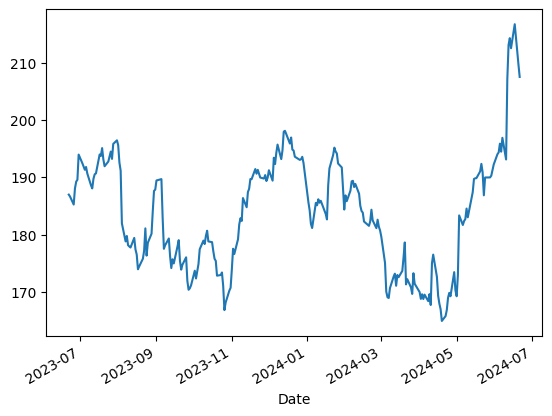

In [28]:
from matplotlib import pyplot
df.loc[df['Ticker'] == 'AAPL']['Close'].plot()
pyplot.show()

### Top 20 highest returns in the last 3 months

In [82]:
s = df.loc[df.index == (df.index[-1] - datetime.timedelta(days=91))]
#s.sort_values(ascending=False).head(20)
s.head()

Price,Ticker,Adj Close,Close,High,Low,Open,Volume
2024-03-22,A,147.210846,147.449997,149.279999,146.419998,148.850006,1076600.0
2024-03-22,AAL,14.820000,14.820000,14.880000,14.650000,14.710000,16146800.0
2024-03-22,AAPL,172.046646,172.279999,173.050003,170.059998,171.759995,71106600.0
2024-03-22,ABBV,176.798874,178.449997,178.990005,176.779999,177.229996,4084000.0
2024-03-22,ABNB,167.860001,167.860001,168.800003,166.639999,167.000000,2834300.0


In [129]:
left = df.iloc[-503:-1][['Ticker', 'Close']]
right = s[['Ticker', 'Close']]
result = pd.merge(left, right, on='Ticker', how='inner')

In [130]:
result.head()

Price,Ticker,Close_x,Close_y
0,A,133.250000,147.449997
1,AAL,11.200000,14.820000
2,AAPL,207.490005,172.279999
3,ABBV,170.389999,178.449997
4,ABNB,149.570007,167.860001


In [131]:
result['ret'] = result['Close_x'] - result['Close_y']
result.sort_values(by='ret', ascending=False).head(20)

Price,Ticker,Close_x,Close_y,ret
63,BKNG,3989.100098,3624.729980,364.370117
100,CMG,3210.489990,2882.040039,328.449951
44,AVGO,1658.630005,1353.469971,305.160034
189,FICO,1436.109985,1276.739990,159.369995
320,MPWR,826.169983,672.309998,153.859985
330,MTD,1463.479980,1327.599976,135.880005
109,COST,848.309998,734.799988,113.510010
285,LLY,883.880005,770.609985,113.270020
271,KLAC,816.549988,710.559998,105.989990
196,FSLR,258.869995,153.309998,105.559998


In [28]:
def get_top_returns(period: str, days:int, end: datetime.date):
    df = get_sp500_data(period)
    s = df.loc[df.index == get_weekday(end - datetime.timedelta(days=days))]
    left = df.loc[df.index == get_weekday(end)][['Ticker', 'Close']]
    right = s[['Ticker', 'Close']]
    result = pd.merge(left, right, on='Ticker', how='inner')
    result['ret'] = (result['Close_x'] - result['Close_y'])/result['Close_y']
    return result.sort_values(by='ret', ascending=False).head(20)

In [29]:
get_top_returns('1y', 90, datetime.date(2024, 6, 25))

[******************    38%%                      ]  193 of 503 completed

$BF.B: possibly delisted; No price data found  (period=1y)


[*********************100%%**********************]  503 of 503 completed

4 Failed downloads:
['SOLV', 'GEV']: YFInvalidPeriodError("%ticker%: Period '1y' is invalid, must be one of ['1d', '5d', '1mo', '3mo', 'ytd', 'max']")
['BF.B']: YFPricesMissingError('$%ticker%: possibly delisted; No price data found  (period=1y)')
['BRK.B']: YFChartError('%ticker%: No data found, symbol may be delisted')


Price,Ticker,Close_x,Close_y,ret
196,FSLR,257.684998,167.449997,0.538877
347,NVDA,124.460297,90.250000,0.379061
437,TER,147.270004,111.540001,0.320334
475,VST,89.250000,68.300003,0.306735
322,MRNA,136.979996,110.589996,0.238629
342,NRG,81.394997,66.620003,0.221780
320,MPWR,818.455017,673.140015,0.215876
211,GOOG,184.409195,151.940002,0.213697
2,AAPL,210.270004,173.309998,0.213260
212,GOOGL,182.929993,150.869995,0.212501
